In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from functools import reduce
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt 
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import datetime


In [2]:
data_all = pd.read_csv('data_all.csv')
data_all

,location,Date,PM25,Lat,Long,NDVI_8000_mean,QA_8000_mean,TIMEOFDAY_8000_mean,NDVI_8000_min,QA_8000_min,...,0_NO2_column_number_density,0_NO2_slant_column_number_density,0_stratospheric_NO2_column_number_density,0_tropopause_pressure,0_tropospheric_NO2_column_number_density,1_O3_column_number_density,2_CO_column_number_density,2_H2O_column_number_density,2_cloud_height,3_absorbing_aerosol_index
0,Aberdeen,2018-09-27,3.294118,57.157360,-2.094278,1220.846695,-310.897349,1556.695652,-288.0,-32632.0,...,0.000084,0.000163,0.000041,11804.879928,0.000051,0.111958,0.028983,1477.630239,557.602175,-1.259474
1,Aberdeen,2018-09-28,3.952381,57.157360,-2.094278,1220.846695,-310.897349,1556.695652,-288.0,-32632.0,...,0.000101,0.000170,0.000041,13526.737539,0.000058,0.116510,0.028686,1150.147929,342.525465,-1.152045
2,Aberdeen,2018-09-29,4.666667,57.157360,-2.094278,1220.846695,-310.897349,1556.695652,-288.0,-32632.0,...,0.000099,0.000190,0.000042,14236.928847,0.000062,0.134758,0.032286,526.551019,67.268342,-0.980849
3,Aberdeen,2018-09-30,3.941176,57.157360,-2.094278,1220.846695,-310.897349,1556.695652,-288.0,-32632.0,...,0.000098,0.000237,0.000045,13148.895225,0.000061,0.127893,0.030695,647.729301,317.475332,-0.620365
4,Aberdeen,2018-10-01,4.684211,57.157360,-2.094278,1220.846695,-310.897349,1556.695652,-288.0,-32632.0,...,0.000096,0.000190,0.000047,17957.345864,0.000056,0.139736,0.031018,608.313814,1056.656916,-0.578224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60853,York Fishergate,2021-05-03,5.900000,53.951889,-1.075861,4161.751108,16514.663220,1519.873708,3895.0,16512.0,...,0.000120,0.000181,0.000058,21527.920556,0.000043,0.171864,0.035553,650.434315,2271.625894,-1.472800
60854,York Fishergate,2021-05-04,1.000000,53.951889,-1.075861,4161.751108,16514.663220,1519.873708,3895.0,16512.0,...,0.000115,0.000164,0.000055,19994.449322,0.000043,0.170350,0.035032,755.791934,2406.136584,-1.220639
60855,York Fishergate,2021-05-05,1.000000,53.951889,-1.075861,4161.751108,16514.663220,1519.873708,3895.0,16512.0,...,0.000085,0.000161,0.000059,20991.549605,0.000037,0.171008,0.033779,728.122242,2306.977735,-1.825140
60856,York Fishergate,2021-05-06,0.956522,53.951889,-1.075861,4161.751108,16514.663220,1519.873708,3895.0,16512.0,...,0.000097,0.000228,0.000066,21165.726652,0.000037,0.179997,0.034395,671.980579,2617.436907,-1.265253


In [3]:
# Ensure all concentrations above 0

data_all = data_all[data_all['PM25'] > 0]

In [5]:
data_all2 = data_all.drop([
       'QA_8000_min',
       'TIMEOFDAY_8000_min', 'NDVI_8000_max', 'QA_8000_max',
       'TIMEOFDAY_8000_max', 'QA_8000_min',
       'TIMEOFDAY_8000_min', 'NDVI_8000_max', 'QA_8000_max',
       'TIMEOFDAY_8000_max', 'elevation_2000_min', 'elevation_2000_max','NDVI_8000_min', 'avg_vis_min', 'cf_cvg_min', 
    'avg_vis_max', 'cf_cvg_max','pop_density2010_min', 'pop_density2010_max'], axis = 1)

data_all2 = data_all2.drop(['Lat_y', 'Long_y'], axis = 1)

In [5]:
data_all2.to_csv('data_all2.csv')

In [3]:
data_all2 = pd.read_csv('data_all2.csv')

In [4]:
#remove outliers based on the PM2.5 values (less than z-score = 3) # within 3 standard deviations from the mean
from scipy import stats
data_all2 = data_all2[(np.abs(stats.zscore(data_all2['PM25'])) < 3)]

<AxesSubplot:xlabel='location', ylabel='PM25'>

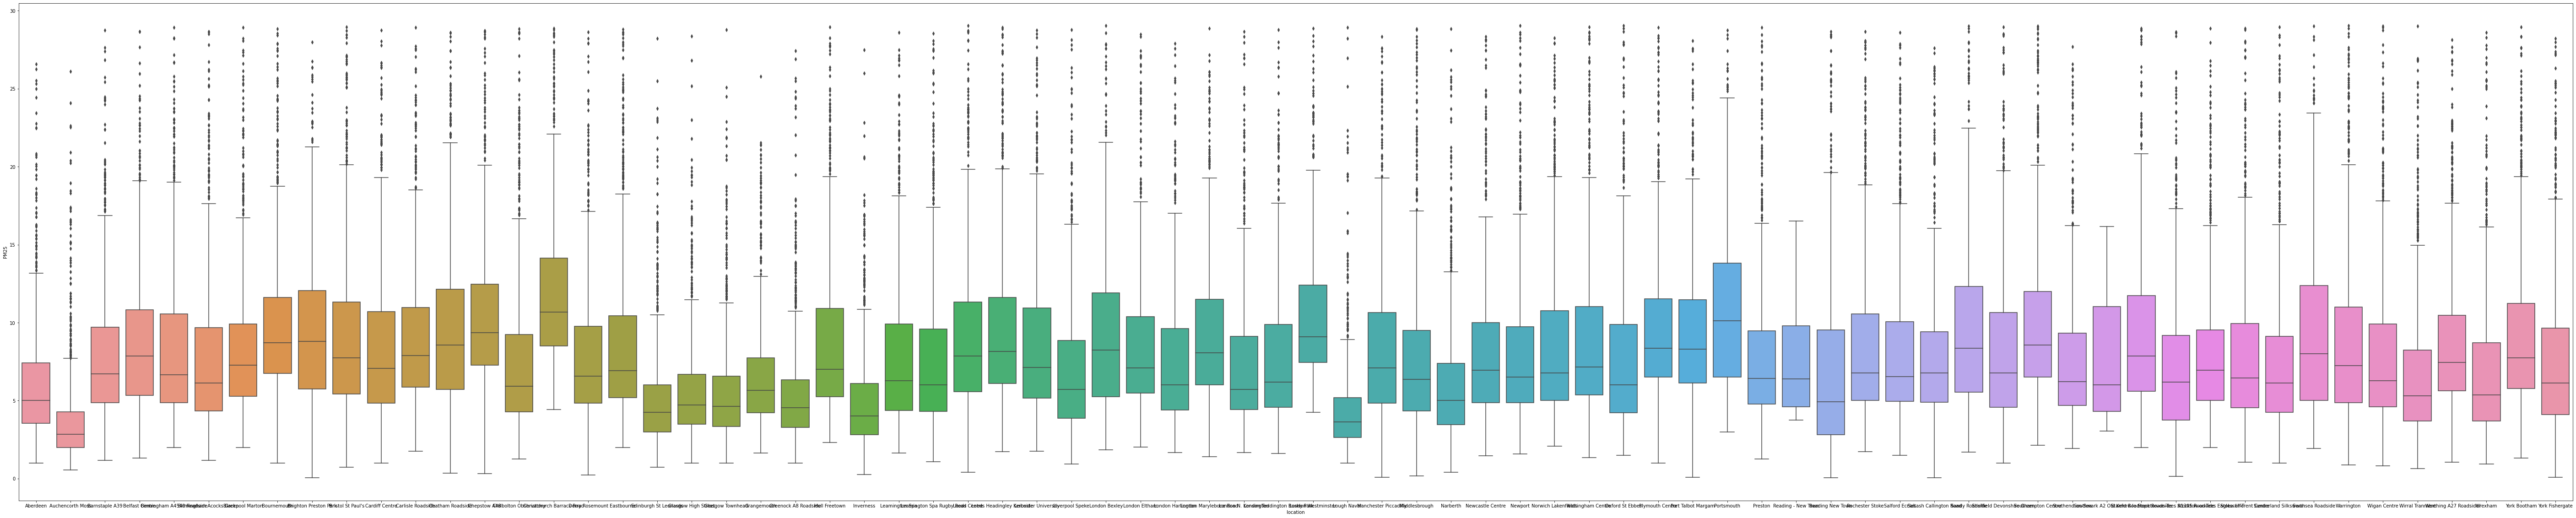

In [5]:
plt. figure(figsize=(100,20))
sns.boxplot(x="location", y="PM25", data=data_all2)

In [5]:
#remove outliers
data_all2 = data_all2[data_all2['0_NO2_column_number_density'] > 0.0]

<AxesSubplot:xlabel='location', ylabel='0_stratospheric_NO2_column_number_density'>

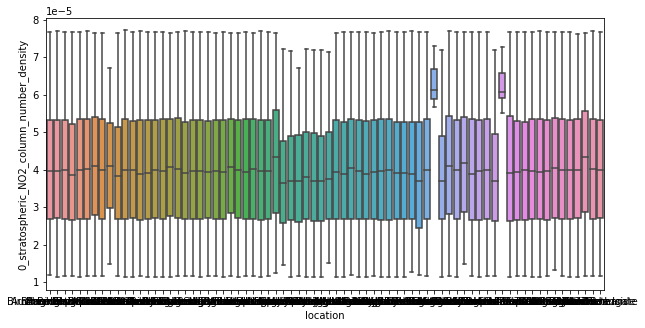

In [6]:
plt. figure(figsize=(10,5))
sns.boxplot(x="location", y='0_stratospheric_NO2_column_number_density', data=data_all2)

In [6]:
data_all2.columns

Index(['Unnamed: 0', 'location', 'Date', 'PM25', 'Lat', 'Long',
       'NDVI_8000_mean', 'QA_8000_mean', 'TIMEOFDAY_8000_mean',
       'elevation_2000_mean', 'avg_vis_mean', 'cf_cvg_mean',
       'pop_density2010_mean', 'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground', '0_NO2_column_number_density',
       '0_NO2_slant_column_number_density',
       '0_stratospheric_NO2_column_number_density', '0_tropopause_pressure',
       '0_tropospheric_NO2_column_number_density',
       '1_O3_column_number_density', '2_CO_column_number_density',
       '2_H2O_column_number_density', '2_cloud_height',
       '3_absorbing_aerosol_index'],
      dtype='object')

In [7]:
data_all2 = data_all2.drop(['QA_8000_mean','TIMEOFDAY_8000_mean', 'avg_vis_mean', 'cf_cvg_mean'], axis = 1)

In [8]:
data_all3 = data_all2.drop(['Unnamed: 0'], axis = 1)

In [9]:
data_all3 = data_all3.copy().rename(columns={'NDVI_8000_mean': 'NDVI', 'elevation_2000_mean': 'Elev',
       'precipitable_water_entire_atmosphere': 'Precipitable Water',
       'relative_humidity_2m_above_ground': 'RH',
       'specific_humidity_2m_above_ground': 'SH', 'temperature_2m_above_ground': 'Temp',
       'u_component_of_wind_10m_above_ground': ' U Velocity',
       'v_component_of_wind_10m_above_ground': 'V Velocity', '0_NO2_column_number_density': ' NO2_column',
       '0_NO2_slant_column_number_density': 'NO2_slant',
       '0_stratospheric_NO2_column_number_density': 'NO2_strat', '0_tropopause_pressure': 'Pressure',
       '0_tropospheric_NO2_column_number_density': 'NO2_trop',
       '1_O3_column_number_density': 'O3', '2_CO_column_number_density': 'CO',
       '2_H2O_column_number_density': 'H2O', '2_cloud_height': 'Cloud_height',
       '3_absorbing_aerosol_index': 'Aerosol', 'pop_density2010_mean':'Population'})

In [10]:
data_all3.columns

Index(['location', 'Date', 'PM25', 'Lat', 'Long', 'NDVI', 'Elev', 'Population',
       'Precipitable Water', 'RH', 'SH', 'Temp', ' U Velocity', 'V Velocity',
       ' NO2_column', 'NO2_slant', 'NO2_strat', 'Pressure', 'NO2_trop', 'O3',
       'CO', 'H2O', 'Cloud_height', 'Aerosol'],
      dtype='object')

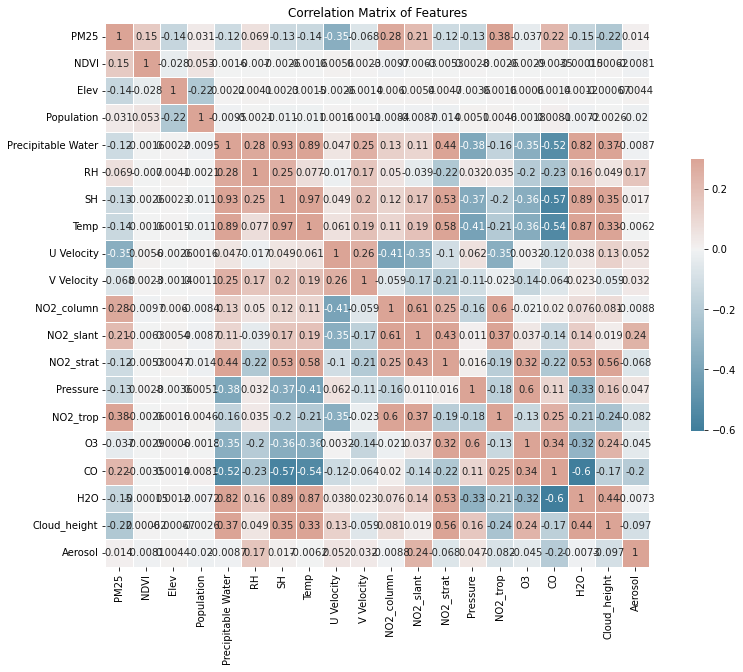

In [11]:
#create a correlation matrix

corr = data_all3.drop(['location','Date', 'Lat', 'Long'], axis = 1).corr()
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap = cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.title('Correlation Matrix of Features');

In [12]:
# Due to multicollinearity, SH, H20 will be removed

data_all4 = data_all3.drop(['SH', 'H2O','Precipitable Water'], axis = 1)

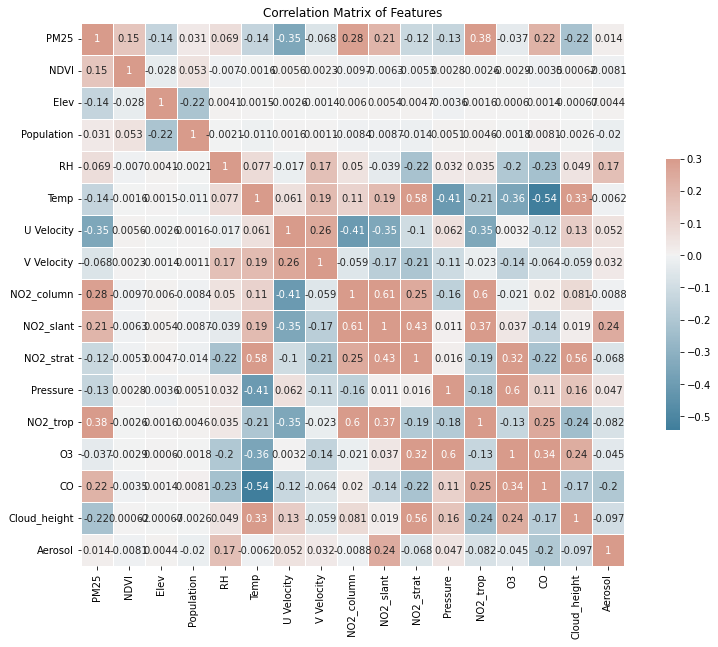

In [13]:
#create a correlation matrix

corr = data_all4.drop(['location','Date', 'Lat', 'Long'], axis = 1).corr()
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap = cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.title('Correlation Matrix of Features');

In [14]:
data_all5 = data_all4.copy().dropna()
data_all5.columns

Index(['location', 'Date', 'PM25', 'Lat', 'Long', 'NDVI', 'Elev', 'Population',
       'RH', 'Temp', ' U Velocity', 'V Velocity', ' NO2_column', 'NO2_slant',
       'NO2_strat', 'Pressure', 'NO2_trop', 'O3', 'CO', 'Cloud_height',
       'Aerosol'],
      dtype='object')

In [15]:
data_all5.columns

Index(['location', 'Date', 'PM25', 'Lat', 'Long', 'NDVI', 'Elev', 'Population',
       'RH', 'Temp', ' U Velocity', 'V Velocity', ' NO2_column', 'NO2_slant',
       'NO2_strat', 'Pressure', 'NO2_trop', 'O3', 'CO', 'Cloud_height',
       'Aerosol'],
      dtype='object')

In [16]:
frame = data_all5.copy()

In [22]:
frame.to_csv('frame.csv')

In [2]:
frame = pd.read_csv('frame.csv')

In [17]:
frame_sorted = frame.sort_values('Date')

In [20]:
# Data that will be used for training 

ML_training = frame_sorted.iloc[:33062]

In [34]:
X = ML_training.drop(['location', 'Date', 'Lat', 'Long', 'PM25'], axis = 1)

In [35]:
y = ML_training['PM25']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# y_train = frame_sorted['PM25'].iloc[:33062]
# y_train.shape

(33062,)

In [21]:
# X_train = frame_sorted.drop(['location', 'Date', 'Lat', 'Long', 'PM25'], axis = 1).iloc[:33062]
# X_train.columns

Index(['NDVI', 'Elev', 'Population', 'RH', 'Temp', ' U Velocity', 'V Velocity',
       ' NO2_column', 'NO2_slant', 'NO2_strat', 'Pressure', 'NO2_trop', 'O3',
       'CO', 'Cloud_height', 'Aerosol'],
      dtype='object')

In [22]:
# X_test = frame_sorted.drop(['location', 'Date', 'Lat', 'Long','PM25'], axis = 1).iloc[33062:]

In [95]:
# y_test = frame_sorted['PM25'].iloc[33062:]

In [37]:
rf = RandomForestRegressor(n_estimators = 100, random_state= 42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
rf_pred = rf.predict(X_test)

In [39]:
print('Score on train data: {}\n'.format(rf.score(X_train, y_train.values.ravel())))
print('Best parameters found:')

Score on train data: 0.9586680100789592

Best parameters found:


In [40]:
ypred_df = pd.DataFrame({"prediction": rf_pred})
pred_df = pd.DataFrame(y_test)
pred_df['prediction'] = ypred_df['prediction'].values
pred_df.reset_index()

,index,PM25,prediction
0,506,2.666667,3.643878
1,9539,23.958333,21.133622
2,32395,11.772727,10.791398
3,5535,11.166667,10.935669
4,55768,4.130435,4.925237
...,...,...,...
6608,33387,11.260870,11.076582
6609,4756,8.428571,10.784057
6610,21620,9.458333,10.745816
6611,19386,6.454545,6.511045


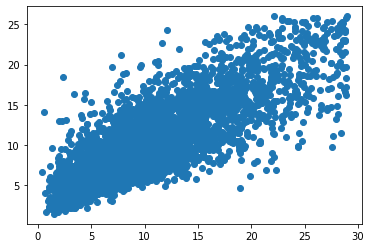

In [41]:
# x = np.array(y_test).flatten()
# y = rf_pred
# plt.scatter(x = x, y = y, lw = 6, alpha = 0.3)
# plt.xlabel('Ground Truth')
# plt.ylabel('Predicted values')
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'yellow')
# plt.text(20,400, 'R-squared = %0.2f' % score, color = 'green')
# plt.show()

plt.scatter(y_test, rf_pred)

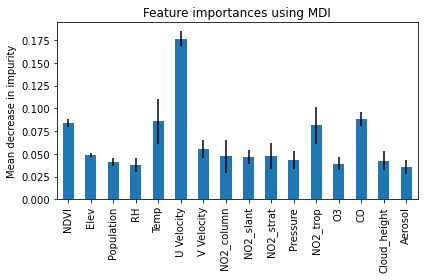

In [89]:
import pandas as pd
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index= X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [42]:
mean_squared_error(y_test, rf_pred)

8.513546783849716

In [43]:
from sklearn.metrics import mean_absolute_error

In [44]:
mean_absolute_error(y_test, rf_pred)

2.0519545648867177

In [45]:
mean_squared_error(y_test, rf_pred)**0.5

2.9177982767576163

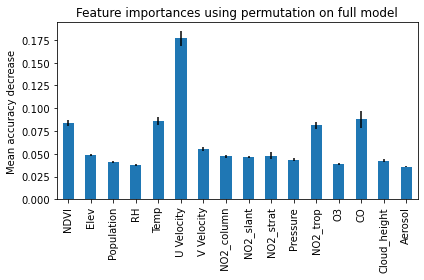

In [93]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [47]:
test_frame = pd.read_csv('test_frame.csv')

In [49]:
test_frame = test_frame.fillna(76.3)

In [129]:
predicted_pm25 = forest_best_estim.predict(test_frame.drop(['Unnamed: 0', 'location', 'Lat', 'Long', 'Date', 'city', 'country', 'Precipitable Water'], axis = 1))

In [153]:
predictions = pd.read_csv('predictions.csv')

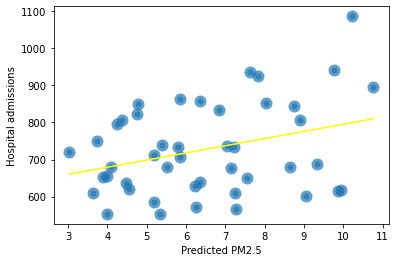

In [172]:
x = predictions['Predicted PM2.5']
y = predictions['Respiratory Average']
plt.scatter(x = x, y = y, lw = 6, alpha = 0.7)
plt.xlabel('Predicted PM2.5')
plt.ylabel('Hospital admissions')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'yellow')

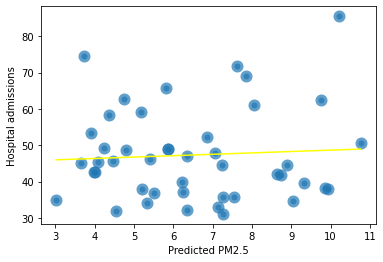

In [173]:
x = predictions['Predicted PM2.5']
y = predictions['Asthma Average']
plt.scatter(x = x, y = y, lw = 6, alpha = 0.7)
plt.xlabel('Predicted PM2.5')
plt.ylabel('Hospital admissions')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'yellow')

In [159]:
covariance = np.cov(predictions['Predicted PM2.5'],predictions['Respiratory Average'])
print(covariance)

[[4.31411645e+00 8.34494220e+01]
 [8.34494220e+01 1.52166895e+04]]


In [160]:
from scipy.stats import pearsonr

In [161]:
pearsonr(predictions['Predicted PM2.5'],predictions['Respiratory Average'])[0]

0.3256996646569998

In [170]:
pearsonr(predictions['Predicted PM2.5'],predictions['Asthma Average'])[0]

0.06264698021113817